In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import pandas as pd
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, because Keras may or maynot contain the features discussed here depending upon when you read this article, until the keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [2]:
animals = ['Aardvark', 'African buffalo', 'African caracal', 'Baboon',
       'Bat-eared fox', 'Rhinoceros', 'Bushbaby', 'Cheetah', 'Chimpanzee',
       'Dik dik', 'Elephant', 'Fossa', 'Genet cat', 'Gerenuk', 'Giraffe',
       'Hartebeest', 'Hippopotamus', 'Honey badger', 'Hyena', 'Impala',
       'Jackal', 'Lemur', 'Leopard', 'Lion', 'Meerkat', 'Mongoose',
       'Mountain gorilla', 'Nile crocodile', 'Pangolin', 'Puku', 'Serval',
       'Suni', 'Terrapin', 'Topi', 'Vervet monkey', 'Warthog', 'Waterbuck',
       'Wild dog', 'Wildebeest', 'Zebra', 'Chameleon', 'Kudu', 'Ostrich',
       'Eland', 'Mandrill', 'Lowland gorilla', 'Oryx', 'Black mamba']

In [3]:
def animal_names(array):
    result = [(animal_name) for animal_name,encoded in zip(df.columns[1:], array) if encoded == 1]
    return result

In [4]:
def grid(x,y):
    C = 10
    R = 5
    plt.rcParams["figure.figsize"] = (20,10)
    f, axarr = plt.subplots(R,C)
    index = 0
    for col in range(C):
        for row in range(R):
            img = Image.fromarray(x[index], 'RGB')
            axarr[row, col].imshow(img)
            axarr[row, col].axis('off')
            names = ' '.join(animal_names(y[index]))
            axarr[row, col].set_title(names)
            index += 1

In [5]:
import keras
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

class LivePlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()


In [6]:
path_images = '../../dev/animals_all.csv'
df = pd.read_csv(path_images, sep=',')

In [7]:
print(len(df.index))
df.sample(3)

35728


filename  Aardvark  \
17957   dev/imgs/temp/Terrapin/205.terrapin-in-water.jpg         0   
28307  dev/imgs/temp/Bat-eared fox/104.bat-eared-fox-...         0   
21107         dev/imgs/temp/Waterbuck/110.3-1024x682.jpg         0   

       African buffalo  African caracal  Baboon  Bat-eared fox  Rhinoceros  \
17957                0                0       0              0           0   
28307                0                0       0              1           0   
21107                0                0       0              0           0   

       Bushbaby  Cheetah  Chimpanzee  ...  Wildebeest  Zebra  Chameleon  Kudu  \
17957         0        0           0  ...           0      0          0     0   
28307         0        0           0  ...           0      0          0     0   
21107         0        0           0  ...           0      0          0     0   

       Ostrich  Eland  Mandrill  Lowland gorilla  Oryx  Black mamba  
17957        0      0         0                0     0            0  
28307        0      0         0                0     0            0  
21107        0      0         0                0     0            0  

[3 rows x 49 columns]

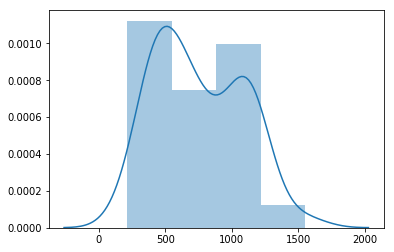

In [8]:
dists = df.loc[:, df.columns != 'filename'].apply(pd.Series.value_counts).iloc[[1]]
sns.distplot(dists)



In [9]:
len(dists.columns)


48

In [10]:
dists

Aardvark  African buffalo  African caracal  Baboon  Bat-eared fox  \
1       425              463             1148     215           1130   

   Rhinoceros  Bushbaby  Cheetah  Chimpanzee  Dik dik  ...  Wildebeest  Zebra  \
1         472       744      447         645      916  ...         541    630   

   Chameleon  Kudu  Ostrich  Eland  Mandrill  Lowland gorilla  Oryx  \
1       1103   751      890   1120       747             1096   425   

   Black mamba  
1          394  

[1 rows x 48 columns]

In [11]:
remove_cols = []
for c in df.columns[1:]:
    size = len(df[df[c]==1].index)
    print(c, size)
    if size < 100:
        remove_cols.append(c)
df = df.drop(remove_cols, axis=1) 


Aardvark 425
African buffalo 463
African caracal 1148
Baboon 215
Bat-eared fox 1130
Rhinoceros 472
Bushbaby 744
Cheetah 447
Chimpanzee 645
Dik dik 916
Elephant 1273
Fossa 419
Genet cat 690
Gerenuk 1113
Giraffe 517
Hartebeest 1134
Hippopotamus 488
Honey badger 408
Hyena 671
Impala 270
Jackal 1130
Lemur 600
Leopard 499
Lion 1551
Meerkat 1149
Mongoose 870
Mountain gorilla 386
Nile crocodile 977
Pangolin 429
Puku 1144
Serval 1127
Suni 407
Terrapin 1155
Topi 361
Vervet monkey 573
Warthog 1029
Waterbuck 750
Wild dog 679
Wildebeest 541
Zebra 630
Chameleon 1103
Kudu 751
Ostrich 890
Eland 1120
Mandrill 747
Lowland gorilla 1096
Oryx 425
Black mamba 394


In [12]:
print(len(df.index))
df.head(2)


35728


filename  Aardvark  African buffalo  \
0  media/images/photos/2019/12/image_27784.jpg         0                0   
1  media/images/photos/2019/12/image_27743.jpg         0                0   

   African caracal  Baboon  Bat-eared fox  Rhinoceros  Bushbaby  Cheetah  \
0                0       0              0           0         0        0   
1                0       0              0           0         0        1   

   Chimpanzee  ...  Wildebeest  Zebra  Chameleon  Kudu  Ostrich  Eland  \
0           0  ...           0      0          0     0        0      0   
1           0  ...           0      0          0     0        0      0   

   Mandrill  Lowland gorilla  Oryx  Black mamba  
0         0                0     0            0  
1         0                0     0            0  

[2 rows x 49 columns]

In [13]:
for c in df.columns[1:]:
    size = len(df[df[c]==1].index)
    print(c, size)

Aardvark 425
African buffalo 463
African caracal 1148
Baboon 215
Bat-eared fox 1130
Rhinoceros 472
Bushbaby 744
Cheetah 447
Chimpanzee 645
Dik dik 916
Elephant 1273
Fossa 419
Genet cat 690
Gerenuk 1113
Giraffe 517
Hartebeest 1134
Hippopotamus 488
Honey badger 408
Hyena 671
Impala 270
Jackal 1130
Lemur 600
Leopard 499
Lion 1551
Meerkat 1149
Mongoose 870
Mountain gorilla 386
Nile crocodile 977
Pangolin 429
Puku 1144
Serval 1127
Suni 407
Terrapin 1155
Topi 361
Vervet monkey 573
Warthog 1029
Waterbuck 750
Wild dog 679
Wildebeest 541
Zebra 630
Chameleon 1103
Kudu 751
Ostrich 890
Eland 1120
Mandrill 747
Lowland gorilla 1096
Oryx 425
Black mamba 394


In [14]:
training_data = []


In [15]:
from PIL import Image
import numpy as np


def create_training_data():
    path = '../../'
    IMG_SIZE = 224
    Y = []
    X = []
    for k,v in df.iterrows():
        try :
            image_path = os.path.join(path, v.filename)
            img_array = cv2.imread(image_path)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X.append(new_array)
            Y.append(v[1:])
        except Exception as e:
            print(image_path)
            print(e)
            pass
    return np.array(X),np.array(Y)

In [16]:
X,Y = create_training_data()


../../dev/imgs/temp/Ostrich/85.Ostrich%2C_mouth_open.jpg
OpenCV(4.1.1) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

../../dev/imgs/temp/Ostrich/84.ostrich-head-closeup.jpg
OpenCV(4.1.1) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

../../dev/imgs/temp/Ostrich/88.screen-0.jpg
OpenCV(4.1.1) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

../../dev/imgs/temp/Ostrich/239.ostrich.jpg
OpenCV(4.1.1) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

../../dev/imgs/temp/Ostrich/87.ostrich-landscape_annotated-e31bf9ab19574cbbafe6fbeeed075d1b.jpg
OpenCV(4.1.1) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

../../dev/imgs/temp/Ostrich/86.10191026-3x2-700x467.j

In [17]:
X.shape, Y.shape

((35696, 224, 224, 3), (35696, 48))

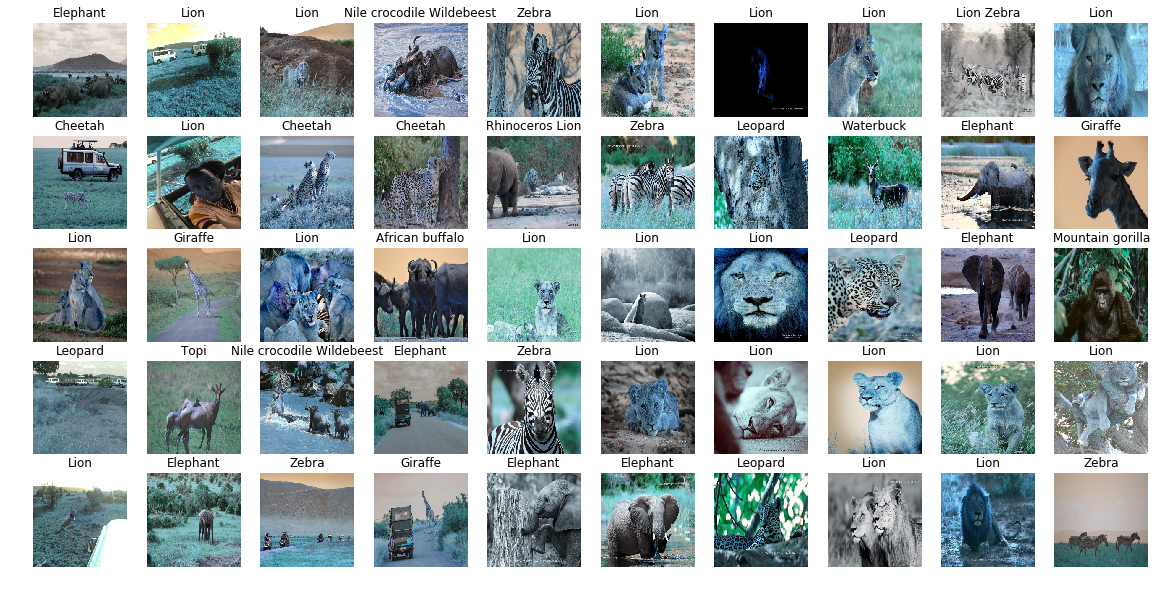

In [18]:
grid(X, Y)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

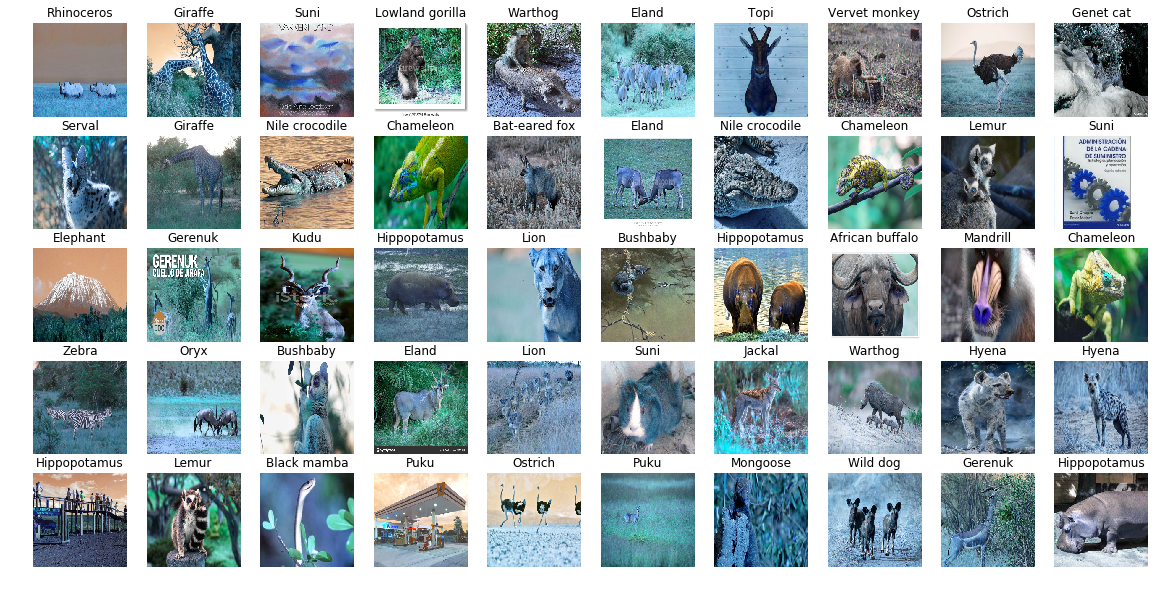

In [20]:
grid(x_test, y_test)

In [21]:
import keras
IMG_SHAPE = (224, 224, 3)

base_model = keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


In [22]:
base_model.trainable = False
model = keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(len(df.columns[1:]), activation='softmax')
])

In [23]:
from keras.metrics import categorical_accuracy

model.compile(keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=[categorical_accuracy])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 48)                61488     
Total params: 2,319,472
Trainable params: 61,488
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 


7140/7140 [==============================] - 242s 34ms/step
Pre-training accuracy: 2.5910%


In [25]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
dt_string

'08_01_2020_09_56_37'

In [26]:
model_json = model.to_json()
with open("data/model_%s.json" % dt_string, "w") as json_file:
    json_file.write(model_json)


In [27]:
with open("data/animals_%s.json" % dt_string, "w") as animals_file:
    animals_file.write(",".join(df.columns))


In [ ]:
#https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7
from keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 200

es = EarlyStopping(monitor='val_loss', patience=8)
ch = ModelCheckpoint(filepath='data/weights_%s.hdf5' % dt_string, 
                               verbose=1, save_best_only=True)


callbacks = [es, ch, LivePlot()]
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, 
          epochs=num_epochs, 
          validation_data=(x_test, y_test), 
          verbose=1,
          callbacks=callbacks)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 28556 samples, validate on 7140 samples
Epoch 1/150
12800/28556 [============>.................] - ETA: 7:55 - loss: 3.6919 - categorical_accuracy: 0.0977

In [72]:
#load weights
model.load_weights('data/weights_30_12_2019_15_08_48.hdf5')

In [73]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]
print("Post-training accuracy: %.4f%%" % accuracy) 


7140/7140 [==============================] - 194s 27ms/step
Post-training accuracy: 2.8011%


In [74]:
y_predicted = model.predict(x_test,verbose=1)

7140/7140 [==============================] - 194s 27ms/step


In [75]:
y_predicted_ = np.argmax(y_predicted,-1)
y_predicted_

array([29, 30, 24, ..., 30,  4, 42])

In [76]:
y_test_ = np.argmax(y_test,-1)
y_test_

array([ 5, 30, 10, ...,  9, 31, 43])

In [77]:
print(sum(y_predicted_==y_test_)/len(y_test_))


0.028011204481792718


TypeError: zip argument #2 must support iteration

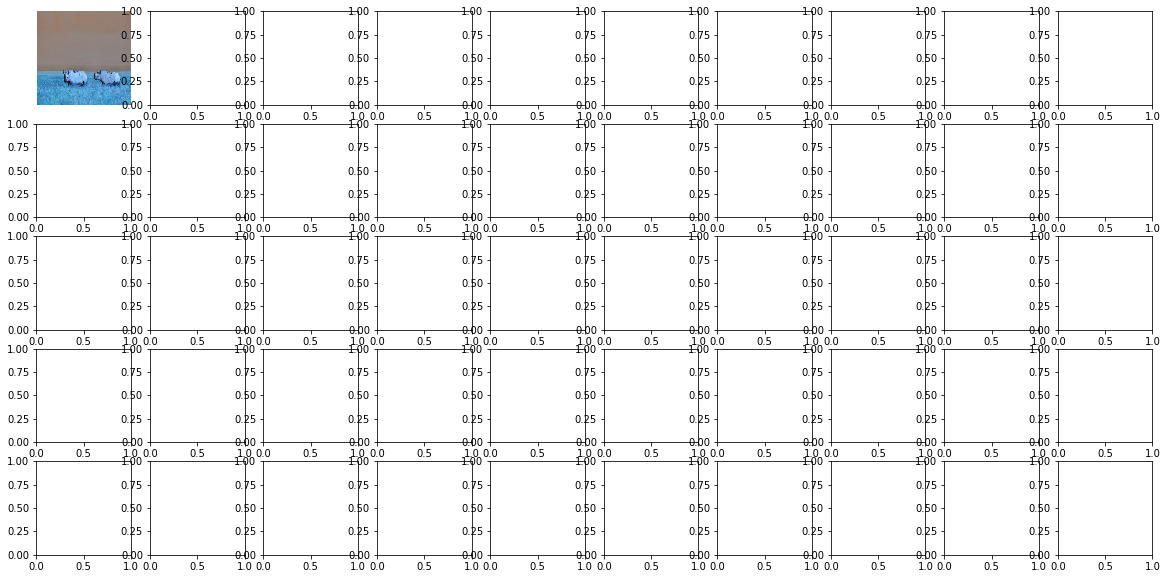

In [50]:
grid(x_test, y_predicted_)

In [48]:
y_predicted[0], y_test[0]

(array([0.0246307 , 0.00442597, 0.05227607, 0.06561664, 0.06999391,
        0.04741701, 0.02267772, 0.00545323, 0.0454258 , 0.12807918,
        0.02078462, 0.00255024, 0.01559043, 0.08848301, 0.00191003,
        0.00945142, 0.01916292, 0.019086  , 0.00781882, 0.00297928,
        0.04455626, 0.00833532, 0.04171821, 0.02976674, 0.06266221,
        0.01027733, 0.0281001 , 0.01996854, 0.02478507, 0.13905424,
        0.05468115, 0.02437374, 0.01309893, 0.0265716 , 0.00440443,
        0.01180238, 0.05294931, 0.03342438, 0.01777238, 0.07150736,
        0.08190459, 0.04192325, 0.08926609, 0.03131548, 0.02455837,
        0.02778205, 0.03092185, 0.01095012], dtype=float32),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=object))

In [44]:
y_predicted_ = y_predicted

idx = np.argmax(y_predicted_, axis=-1)
y_predicted_ = np.zeros(y_predicted_.shape )
y_predicted_[ np.arange(y_predicted_.shape[0]), idx] = 1
y_predicted_[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

TypeError: zip argument #2 must support iteration

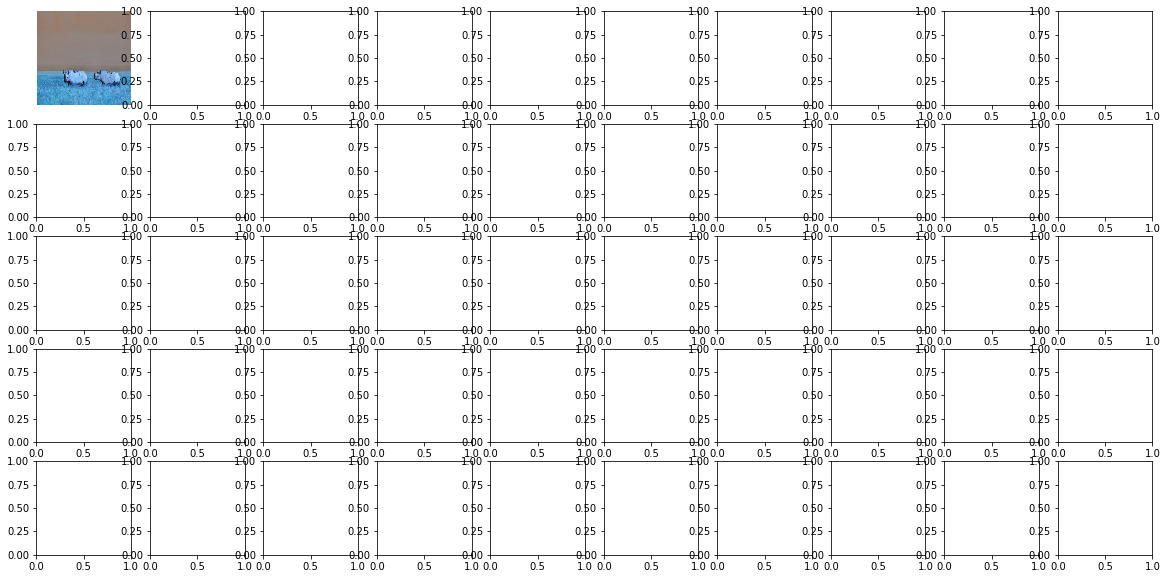

In [49]:
grid(x_test, y_predicted_)

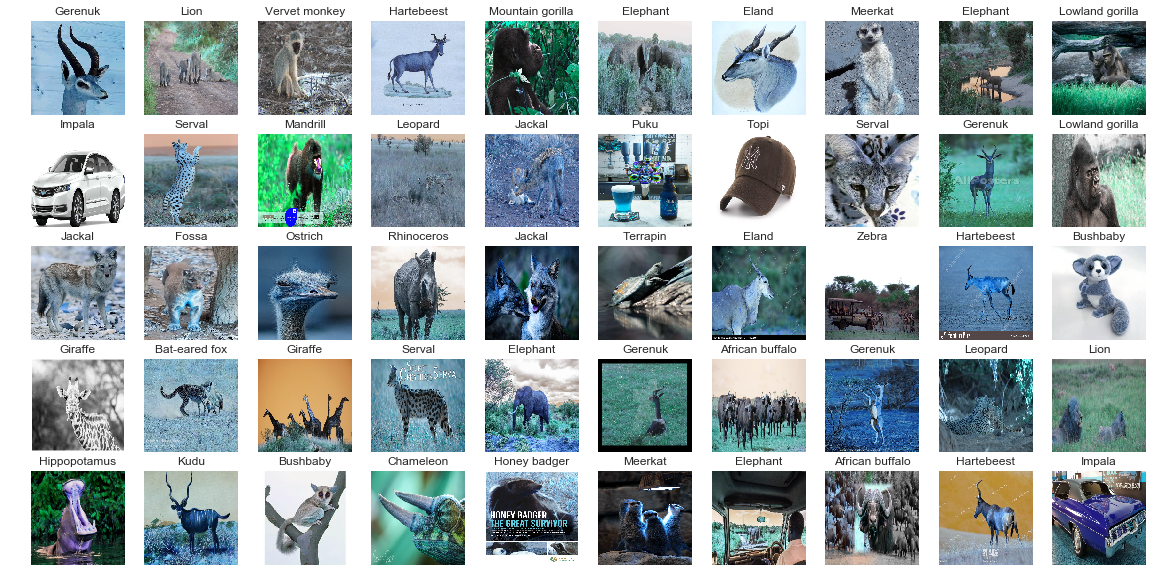

In [100]:
grid(x_test, y_test)

In [ ]:
y_predicted_ = y_predicted
y_predicted_[y_predicted_>=0.5] = 1
y_predicted_[y_predicted_<0.5] = 0


In [232]:
from keras.models import model_from_json
json_file = open('data/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("data/weights.best.basic_cnn.hdf5")
print("Loaded model from disk")

Loaded model from disk


In [233]:
IMG_SIZE = 200
try:
    image_path = os.path.join('/home/juan/Desktop/juan/dev/yas/media/images/animals/image_5')
    img_array = cv2.imread(image_path)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
except Exception as e:
    print(image_path)
    print(e)

In [224]:
X = np.array(new_array)

In [225]:
X.shape

(200, 200, 3)

In [226]:
X = X.reshape(1,200,200,3)

In [227]:

Y = loaded_model.predict(X)

In [228]:
Y[0]

array([0.118334  , 0.08657333, 0.06453878, 0.05220044, 0.01571369,
       0.15378219, 0.11859182, 0.0405041 , 0.01878083, 0.02557448,
       0.04365152, 0.02658519, 0.03706306, 0.03657147, 0.05935067,
       0.04592967, 0.10536176, 0.02322376, 0.12901935, 0.02646238,
       0.13529807, 0.00589147, 0.00810075, 0.07145607, 0.13404304,
       0.01808375, 0.02546695, 0.03831398, 0.07243246, 0.03065223,
       0.0743998 , 0.02631012, 0.03938189, 0.03962287, 0.03655085,
       0.31054908, 0.0424538 , 0.09849516, 0.01797369, 0.02801231,
       0.01700866, 0.03694347, 0.10661361, 0.05268934, 0.04042038,
       0.02375472, 0.02165699, 0.02716848], dtype=float32)

In [229]:
res = dict(zip(df.columns[1:], Y[0]))

In [234]:

{k: v for k, v in sorted(res.items(), key=lambda item: item[1])}


{'Lemur': 0.005891472,
 'Leopard': 0.008100748,
 'Bat-eared fox': 0.015713692,
 'Chameleon': 0.017008662,
 'Wildebeest': 0.017973691,
 'Mongoose': 0.018083751,
 'Chimpanzee': 0.018780828,
 'Oryx': 0.02165699,
 'Honey badger': 0.023223758,
 'Lowland gorilla': 0.023754716,
 'Mountain gorilla': 0.025466949,
 'Dik dik': 0.025574476,
 'Suni': 0.026310116,
 'Impala': 0.026462376,
 'Fossa': 0.026585191,
 'Black mamba': 0.027168483,
 'Zebra': 0.028012305,
 'Puku': 0.030652225,
 'Vervet monkey': 0.03655085,
 'Gerenuk': 0.036571473,
 'Kudu': 0.036943465,
 'Genet cat': 0.037063062,
 'Nile crocodile': 0.038313985,
 'Terrapin': 0.03938189,
 'Topi': 0.039622873,
 'Mandrill': 0.040420383,
 'Cheetah': 0.040504098,
 'Waterbuck': 0.042453796,
 'Elephant': 0.04365152,
 'Hartebeest': 0.04592967,
 'Baboon': 0.052200437,
 'Eland': 0.052689344,
 'Giraffe': 0.05935067,
 'African caracal': 0.06453878,
 'Lion': 0.071456075,
 'Pangolin': 0.07243246,
 'Serval': 0.0743998,
 'African buffalo': 0.08657333,
 'Wild do